# Bank Churn Model
## Author: Eren ERİŞ
Dataset: https://www.kaggle.com/datasets/shubh0799/churn-modelling

Desription : 

In [11]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np 
import os 
import pandas as pd 

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder


In [2]:
df = pd.read_csv("/kaggle/input/churn-modelling/Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<Axes: >

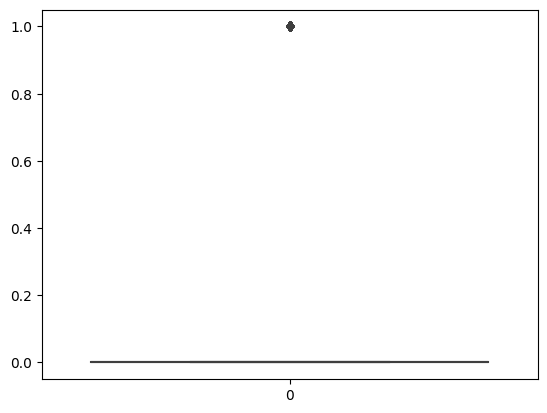

In [6]:
sns.boxplot(df['Exited'])

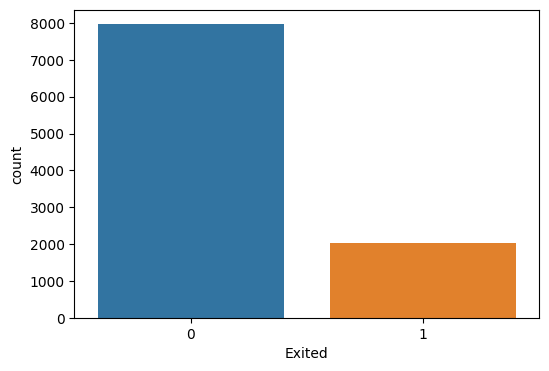

In [7]:
plt.figure(figsize = (6,4))

sns.countplot(data = df, x = 'Exited')
plt.show()

array([[<Axes: title={'center': 'RowNumber'}>,
        <Axes: title={'center': 'CustomerId'}>,
        <Axes: title={'center': 'CreditScore'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>],
       [<Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>],
       [<Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>, <Axes: >]], dtype=object)

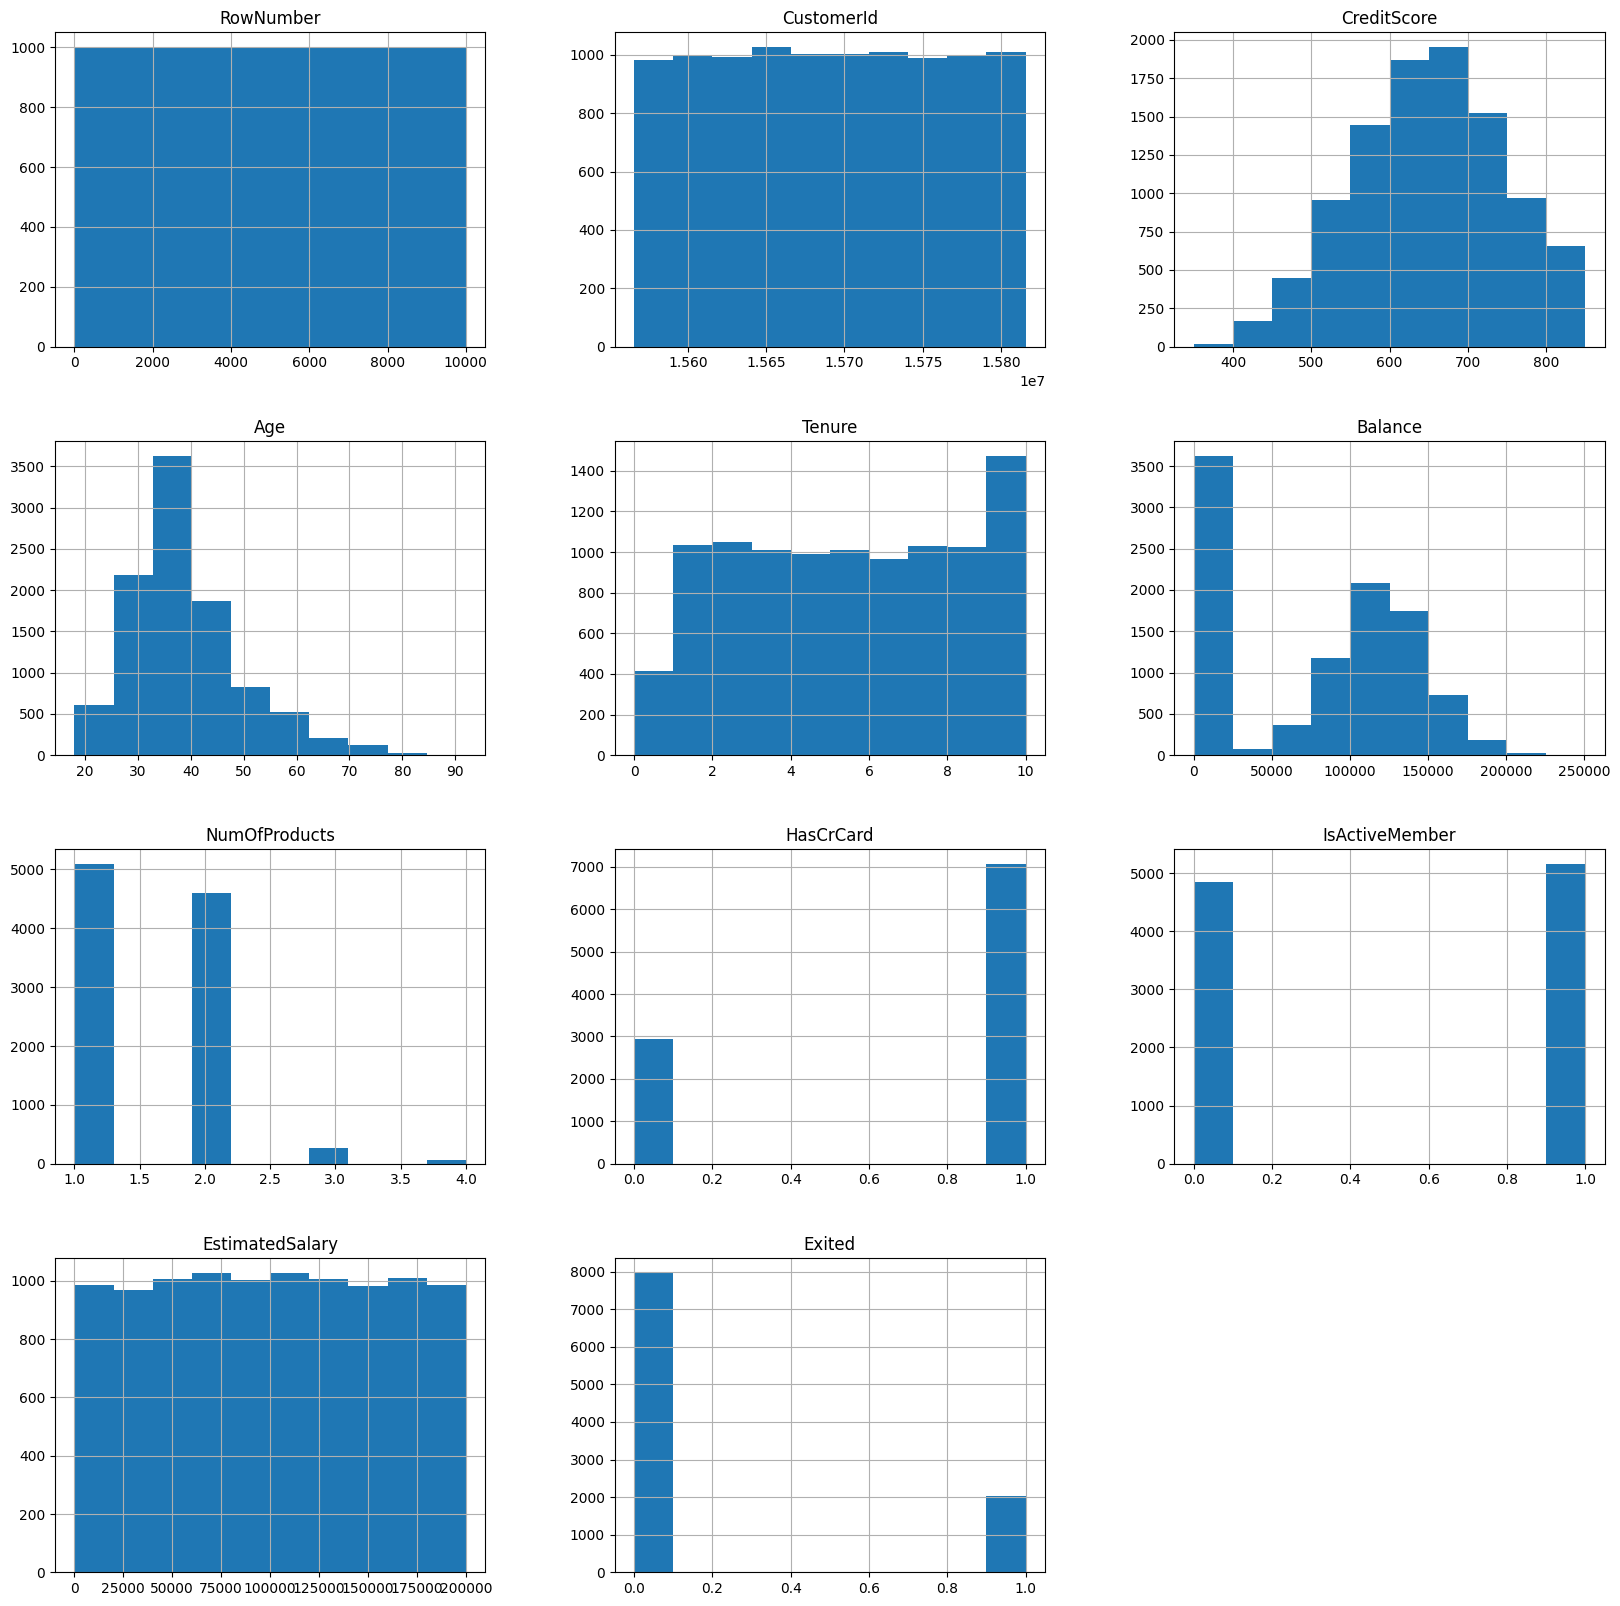

In [8]:
df.hist(figsize = (20,20))

In [12]:
encoder=LabelEncoder()
df['Geography'] = encoder.fit_transform(df['Geography'])
df['Gender'] = encoder.fit_transform(df['Gender'])

In [13]:
X = df.drop(columns=['Exited','Surname','CustomerId','RowNumber'],axis=1).values
y = df['Exited'].values

In [14]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [20]:
X_train.shape

(8000, 10)

In [33]:
model = Sequential()
model.add(Dense(10,activation='relu',input_dim=X_train.shape[1]))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [34]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 10)                110       
                                                                 
 dense_18 (Dense)            (None, 128)               1408      
                                                                 
 dense_19 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1647 (6.43 KB)
Trainable params: 1647 (6.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [36]:
history=model.fit(X_train,y_train,batch_size=50,epochs=200,verbose=1,validation_split=0.2)

Epoch 1/200
128/128 [==============================] - 1s 3ms/step - loss: 0.5358 - accuracy: 0.7659 - val_loss: 0.4855 - val_accuracy: 0.7975
Epoch 2/200
128/128 [==============================] - 0s 2ms/step - loss: 0.4468 - accuracy: 0.8059 - val_loss: 0.4321 - val_accuracy: 0.8138
Epoch 3/200
128/128 [==============================] - 0s 2ms/step - loss: 0.4059 - accuracy: 0.8255 - val_loss: 0.4042 - val_accuracy: 0.8313
Epoch 4/200
128/128 [==============================] - 0s 2ms/step - loss: 0.3825 - accuracy: 0.8402 - val_loss: 0.3891 - val_accuracy: 0.8394
Epoch 5/200
128/128 [==============================] - 0s 2ms/step - loss: 0.3696 - accuracy: 0.8475 - val_loss: 0.3833 - val_accuracy: 0.8419
Epoch 6/200
128/128 [==============================] - 0s 3ms/step - loss: 0.3615 - accuracy: 0.8509 - val_loss: 0.3763 - val_accuracy: 0.8469
Epoch 7/200
128/128 [==============================] - 0s 2ms/step - loss: 0.3561 - accuracy: 0.8525 - val_loss: 0.3739 - val_accuracy: 0.8456

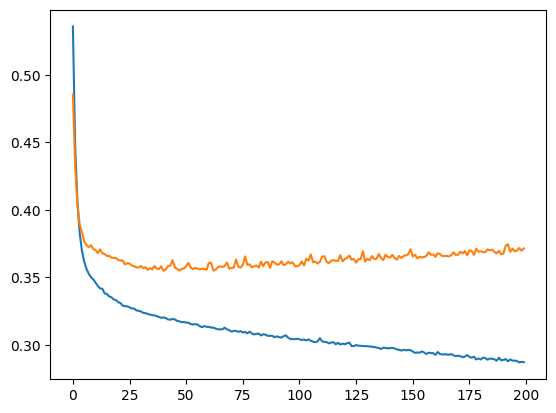

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])